# Non-Linear Fitting

This is an example notebook on how to do nonlinear curve fitting with the example of Gaussian and Lorentzian fits.

## Load Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
%matplotlib inline

## Define Functions

One could have used the built in functions, but I wanted to give a very simple example of how to define a fitting function. 

In [2]:
def Gauss(x,y0,a,mu,sigma):
    return y0+a/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

def Lorentz(x,y0,a,xc,w):
    return y0+(2*a/np.pi)*(w/(4*(x-xc)**2 + w**2))

## Data

In [3]:
x_min = -10
x_max = 10
x_n = 101
x = np.linspace(x_min,x_max,x_n)

In [4]:
y = Gauss(x, 0, 1.5, 1, 1.5)+np.random.normal(0, 0.05, x_n)

### Plot Data

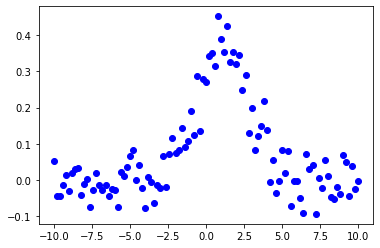

In [5]:
plt.plot(x, y, 'bo')
plt.show()

### Fitting

Perform teh fit using the Gauss model and obtaining the fit results as well as teh conficence band

In [6]:
gmodel = Model(Gauss)
result = gmodel.fit(y, x=x, y0=0, a=1, mu=1, sigma=1)

conf = result.eval_uncertainty(sigma=1)

print(result.fit_report())

[[Model]]
    Model(Gauss)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 101
    # variables        = 4
    chi-square         = 0.22188387
    reduced chi-square = 0.00228746
    Akaike info crit   = -610.192886
    Bayesian info crit = -599.732404
[[Variables]]
    y0:    -0.00566798 +/- 0.00631150 (111.35%) (init = 0)
    a:      1.57545057 +/- 0.08374336 (5.32%) (init = 1)
    mu:     1.11559725 +/- 0.07585895 (6.80%) (init = 1)
    sigma:  1.63914238 +/- 0.08491307 (5.18%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, sigma)  =  0.684
    C(y0, a)     = -0.657
    C(y0, sigma) = -0.449



### Plot Result

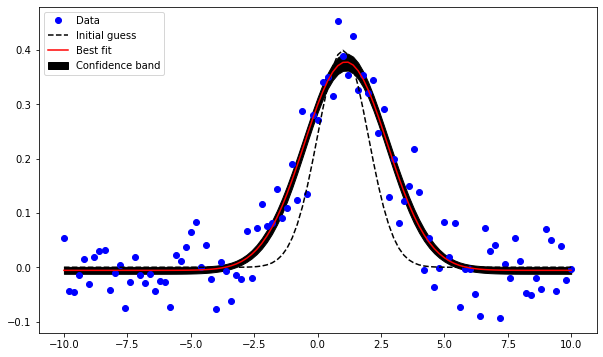

In [7]:
plt.figure(
    num=1,
    figsize=(10,6),
    facecolor='white')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, result.init_fit, 'k--', label='Initial guess')
plt.plot(x, result.best_fit, 'r-', label='Best fit')
plt.fill_between(x, result.best_fit-conf, result.best_fit+conf, color='black', label='Confidence band')
plt.legend(loc=2)
plt.show()

We can also directly access the fit results nad their uncertainties via the covaraince matrix, i.e. if we want to use them in further analysis. The covariance matrix holds the variances of the fitparameters on its diagonal. 

In [8]:
bestvalues = result.best_values

In [9]:
print(bestvalues.get('y0'))
print(bestvalues.get('a'))
print(bestvalues.get('mu'))
print(bestvalues.get('sigma'))

-0.005667982576538536
1.575450571513356
1.115597249749383
1.6391423843526611


In [10]:
covar = result.covar

In [11]:
print(np.sqrt(covar[0,0]))
print(np.sqrt(covar[1,1]))
print(np.sqrt(covar[2,2]))
print(np.sqrt(covar[3,3]))

0.006311501126626404
0.08374335985250589
0.07585895193309514
0.08491307098390181


## Averaged Data

Example fit on data without random but rather systematic errors

In [12]:
avg = 100
xcs = np.random.normal(0, 1, avg)

# Generate the sum of 'avg' Lorentzian resoannces with randomly distributed resonance frequency
y = np.zeros(x_n)
for xc in xcs:
    y = y + Lorentz(x, 0, 1, xc, 1.5)

### Plot Data

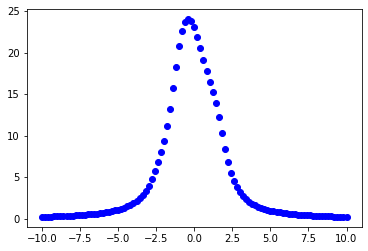

In [13]:
plt.plot(x, y, 'bo')
plt.show()

### Fitting - Lorentzian

In [14]:
lmodel = Model(Lorentz)
result = lmodel.fit(y, x=x, y0=0, a=10, xc=0, w=1)

conf = result.eval_uncertainty(sigma=1)

print(result.fit_report())

[[Model]]
    Model(Lorentz)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 101
    # variables        = 4
    chi-square         = 51.6682440
    reduced chi-square = 0.53266231
    Akaike info crit   = -59.6979931
    Bayesian info crit = -49.2375110
[[Variables]]
    y0: -0.90248118 +/- 0.12222013 (13.54%) (init = 0)
    a:   125.744498 +/- 2.43649957 (1.94%) (init = 10)
    xc: -0.17272633 +/- 0.01794860 (10.39%) (init = 0)
    w:   3.12223385 +/- 0.06684074 (2.14%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, w)  =  0.842
    C(y0, a) = -0.802
    C(y0, w) = -0.645



### Plot Results

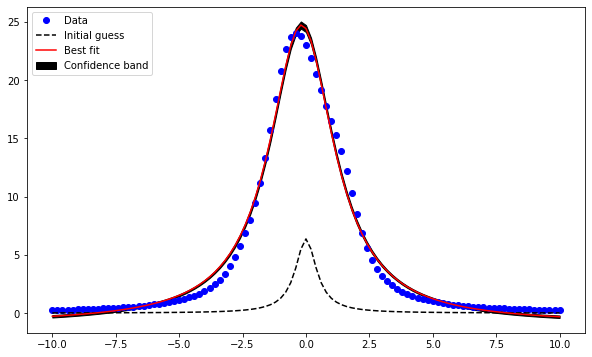

In [15]:
plt.figure(
    num=1,
    figsize=(10,6),
    facecolor='white')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, result.init_fit, 'k--', label='Initial guess')
plt.plot(x, result.best_fit, 'r-', label='Best fit')
plt.fill_between(x, result.best_fit-conf, result.best_fit+conf, color='black', label='Confidence band')
plt.legend(loc=2)
plt.show()

In [16]:
bestvalues = result.best_values

print(bestvalues.get('y0'))
print(bestvalues.get('a'))
print(bestvalues.get('xc'))
print(bestvalues.get('w'))

-0.902481181470391
125.74449769469055
-0.17272633358501957
3.122233847134733


In [17]:
covar = result.covar

print(np.sqrt(covar[0,0]))
print(np.sqrt(covar[1,1]))
print(np.sqrt(covar[2,2]))
print(np.sqrt(covar[3,3]))

0.12222013195261829
2.4364995683025636
0.017948599880474227
0.06684073920173313


### Fitting - Gaussian

In [18]:
gmodel = Model(Gauss)
result = gmodel.fit(y, x=x, y0=0, a=1, mu=0, sigma=1)

conf = result.eval_uncertainty(sigma=1)

print(result.fit_report())

[[Model]]
    Model(Gauss)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 101
    # variables        = 4
    chi-square         = 28.5593766
    reduced chi-square = 0.29442656
    Akaike info crit   = -119.576656
    Bayesian info crit = -109.116174
[[Variables]]
    y0:     0.66311867 +/- 0.06857709 (10.34%) (init = 0)
    a:      81.8402279 +/- 0.85408089 (1.04%) (init = 1)
    mu:    -0.14418043 +/- 0.01370073 (9.50%) (init = 0)
    sigma:  1.44408831 +/- 0.01503599 (1.04%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, sigma)  =  0.668
    C(y0, a)     = -0.617
    C(y0, sigma) = -0.412



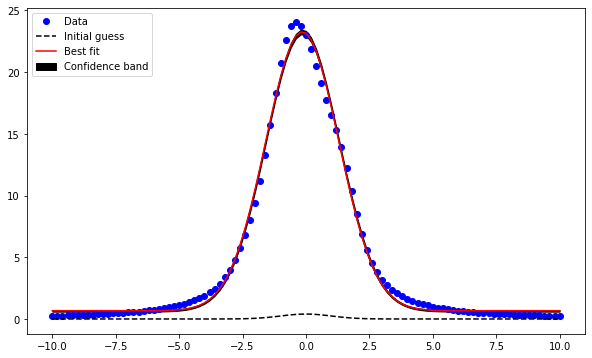

In [19]:
plt.figure(
    num=1,
    figsize=(10,6),
    facecolor='white')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, result.init_fit, 'k--', label='Initial guess')
plt.plot(x, result.best_fit, 'r-', label='Best fit')
plt.fill_between(x, result.best_fit-conf, result.best_fit+conf, color='black', label='Confidence band')
plt.legend(loc=2)
plt.show()

In [20]:
bestvalues = result.best_values

print(bestvalues.get('y0'))
print(bestvalues.get('a'))
print(bestvalues.get('mu'))
print(bestvalues.get('sigma'))

0.663118673128287
81.84022788712365
-0.14418042671049983
1.4440883130854019


In [21]:
covar = result.covar

print(np.sqrt(covar[0,0]))
print(np.sqrt(covar[1,1]))
print(np.sqrt(covar[2,2]))
print(np.sqrt(covar[3,3]))

0.06857708852610861
0.8540808914548087
0.013700726572735697
0.015035994450691927
